768
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
[[94 13]
 [15 32]]
0.6956521739130436
81.81818181818183
%


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

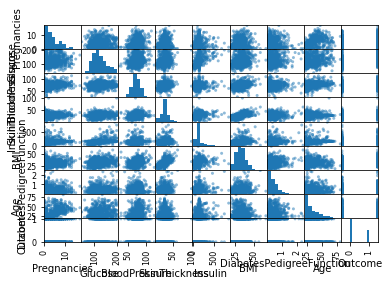

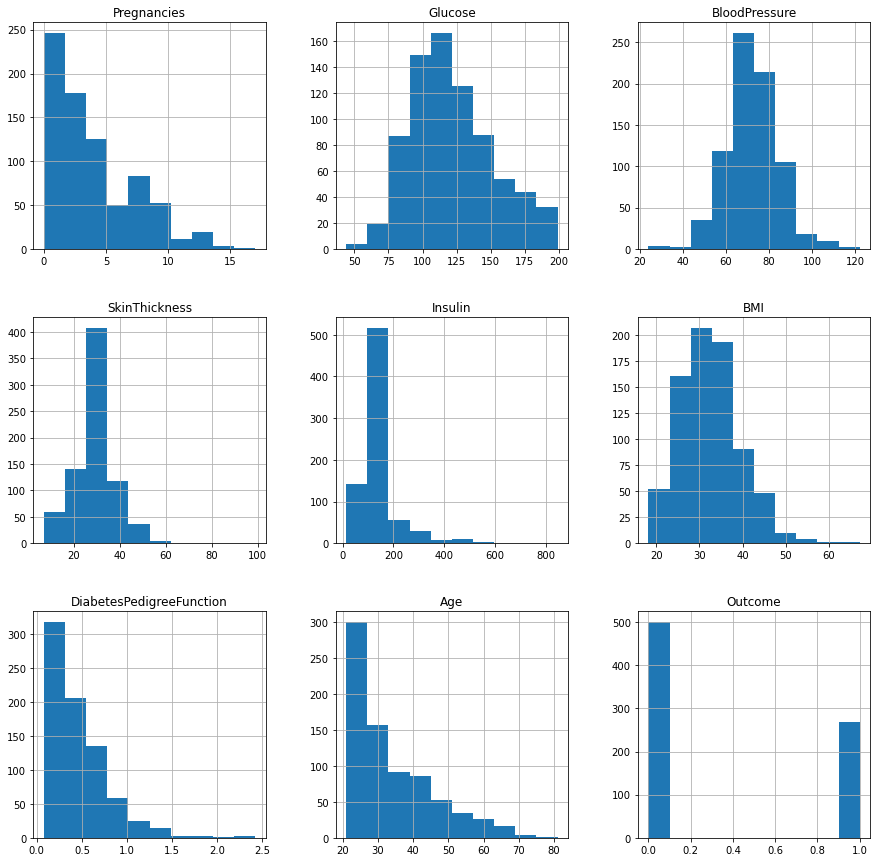

In [2]:
#KNN
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

dataset = pd.read_csv("C:/Users/HP/Desktop/Project ML/diabetes.csv")
                      
print (len(dataset))
print (dataset.head())
                      
zero_not_accepted = ['Glucose'  ,'BloodPressure' , 'SkinThickness' , 'Insulin' ,  'BMI' ]

for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0,np.NaN)
    mean = int (dataset[column].mean (skipna=True))
    dataset[column] = dataset[column].replace(np.NaN,mean)
    
                      
pd.plotting.scatter_matrix(dataset)
x = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0 ,test_size=0.2)

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
                      
classifier = KNeighborsClassifier(n_neighbors=11, p=2 ,metric ='euclidean')
                      
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred                  
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(f1_score(y_test,y_pred))
accuracy = accuracy_score(y_test,y_pred)*100
print (accuracy)
print("%")
sns.barplot(y_test,y_pred)
dataset.hist(figsize=(15,15))

73.7012987012987


<AxesSubplot:xlabel='Outcome'>

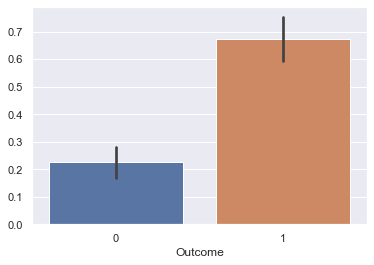

In [3]:
#Decision Tree
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv("C:/Users/HP/Desktop/Project ML/diabetes.csv")
data.columns
data.head
data[data.isnull().any(axis=1)].head()
data = data.dropna()
x=data.drop(['Outcome'],1)
y=data['Outcome']
x_train , x_test , y_train ,y_test =train_test_split(x,y,test_size=.4 ,random_state=234)
diabetes_classifier = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
diabetes_classifier.fit(x_train,y_train)
y_predicted = diabetes_classifier.predict(x_test)
y_predicted[:10]
acc=accuracy_score(y_test ,y_predicted)*100
print(acc)
y_predicted = diabetes_classifier.predict(x_test)
sns.set(color_codes="true")
sns.barplot(x = y_test, y = y_predicted)


In [ ]:
#Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Sequential
%matplotlib inline
data = pd.read_csv("C:/Users/HP/Desktop/Project ML/diabetes.csv")
data.head()
data.isna().sum() 
data.dtypes

X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X
y
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
accuracies=[]

for i in range(10):
    tf.random.set_seed(i)
    model =Sequential()
    model.add(Dense(1, input_dim=8,  activation ='sigmoid'))
    model.compile(loss='binary_crossentropy',  optimizer='adam',  metrics=['accuracy'])
    model.fit(X_train,y_train, epochs=1500, batch_size=100, verbose=0)
    accuracy = model.evaluate(X_test,y_test)
    accuracies.append(accuracy*100)    
    
    
    
    
    
sum(accuracy)/len(accuracy)
   
y_pred= model.predict(X)
y_pred= np.where(y_pred<.5,0,1)
y

differ = np.abs(y.to_numpy() - y_pred.T)
fig, ax = plt.subplots()
ax.scatter(x=X['BMI'],y=X['Age'],c=differ,alpha=.25)



In [ ]:
#K-Mean
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import datasets

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

%matplotlib inline

data = pd.read_csv("C:/Users/HP/Desktop/Project ML/diabetes.csv")   
data.head(10) 

data.shape
data.dtypes
data.describe()
data.isnull().sum()
data.info()
print(data.groupby('Outcome').size()) 

import seaborn as sns
sns.countplot(x = 'Outcome',data = data)

data.columns
dataset_new = data
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] =dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 
dataset_new.isnull().sum()
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)
data1 = pd.DataFrame(dataset_scaled)
data1

sns.heatmap(data1.corr(), annot = True)
plt.show()

sns.pairplot(data=data, hue='Outcome')
plt.show()

X = data1.iloc[:, [1, 4, 5]].values
Y = data1.iloc[:, 8].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

import sklearn
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X_train)

print(KMeans_Clustering.cluster_centers_)

kpred = KMeans_Clustering.predict(X_test)

print('Classification report:\n\n', sklearn.metrics.classification_report(Y_test,kpred))

from sklearn.metrics import confusion_matrix
print("Confusion Matrix :")
outcome_labels = sorted(data.Outcome.unique())
sns.heatmap(
    confusion_matrix(Y_test, kpred),
    annot=True,
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

out = KMeans_Clustering.predict([[0.53,0.54,0.5253]])
if (out==0):
    print("No Diabetes")
else:
    print("Diabetes")
    
    plt.scatter(data.iloc[:, [1]].values,data.iloc[:, [5]].values, c=data['Outcome'], cmap='rainbow')
    
    import sklearn
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X)

plt.scatter(data1.iloc[:, [1]].values,data1.iloc[:, [5]].values, c=KMeans_Clustering.labels_, cmap='rainbow')


acc = accuracy_score(Y_test,kpred)*100
print(acc)



In [ ]:
#Data_visualization
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([1,1,1,1])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("comparison between algorithms shown in graph")
Algorithms=['Perceptron' , 'Decision tree' ,'Knn' ,'K_means' ]
Accuracy=[65,73.7,81,30.5]
ax.bar(Algorithms, Accuracy)
plt.show()